## QUANTITATIVE FINANCE PART 2

### FUNDAMENTAL ANALAYSIS

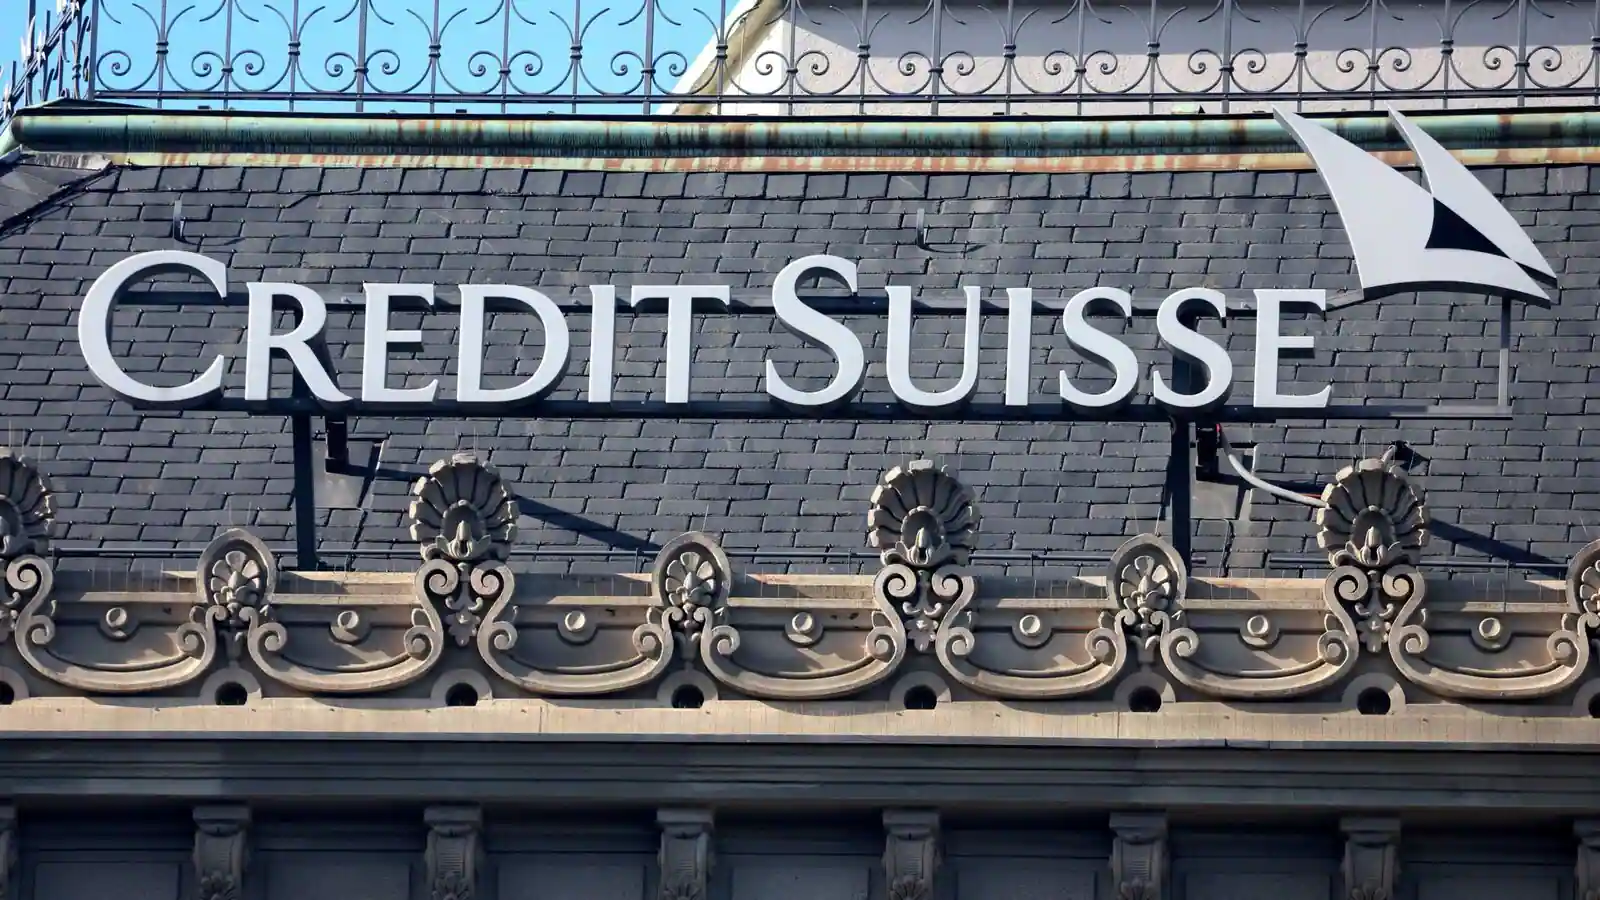

#### BALANCE SHEET

In [1]:
import googlefinance
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import speech_recognition as sr
from bs4 import BeautifulSoup
import fundamentalanalysis as fa
from matplotlib import ticker
import numpy_financial as npf

In [2]:
ticker = "CS"
api_key = "6eb8c70712a889b4f7efbf8d8ad902d4"

In [3]:
# Collect the Balance Sheet statements
balance_sheet_annually = fa.balance_sheet_statement(ticker, api_key, period="annual")

In [4]:
balance_sheet_annually.to_csv('credit_suisse_balance_statement.csv', index=True)

In [5]:
balance_sheet_annually = pd.read_csv('credit_suisse_balance_statement.csv')

In [6]:
balance_sheet_annually.columns.values[0] = "breakdown"

In [7]:
balance_sheet_annually

,breakdown,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,reportedCurrency,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,...,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF
1,cik,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,...,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510
2,fillingDate,2022-12-31,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,...,2009-12-31,2008-12-31,2007-12-31,2006-12-31,2005-12-31,2004-12-31,2003-12-31,2002-12-31,2001-12-31,2000-12-31
3,acceptedDate,2022-12-30 19:00:00,2021-12-30 19:00:00,2020-12-30 19:00:00,2019-12-30 19:00:00,2018-12-30 19:00:00,2017-12-30 19:00:00,2016-12-30 19:00:00,2015-12-30 19:00:00,2014-12-30 19:00:00,...,2009-12-30 19:00:00,2008-12-30 19:00:00,2007-12-30 19:00:00,2006-12-30 19:00:00,2005-12-30 19:00:00,2004-12-30 19:00:00,2003-12-30 19:00:00,2002-12-30 19:00:00,2001-12-30 19:00:00,2000-12-30 19:00:00
4,calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
5,period,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
6,cashAndCashEquivalents,68933000000,166141000000,140410000000,102620000000,101189000000,110541000000,121933000000,93195000000,80593000000,...,53034000000,92047000000,42218000000,37168000000,33799488000,30552676000,27773293080,198507794700,207566036010,36939415300
7,shortTermInvestments,0,154000000,149000000,168000000,857000000,867000000,585000000,452000000,992000000,...,2508000000,3424000000,3529000000,4643000000,0,0,0,0,0,0
8,cashAndShortTermInvestments,68933000000,166295000000,140559000000,102788000000,102046000000,111408000000,122518000000,93647000000,81585000000,...,55542000000,95471000000,45747000000,41811000000,33799488000,30552676000,27773293080,198507794700,207566036010,36939415300
9,netReceivables,13818000000,19571000000,40196000000,40336000000,43962000000,51637000000,38218000000,40200000000,47866000000,...,51448000000,68843000000,69069000000,61628000000,0,0,0,12300820730,11862008850,55581344100


## <font color="red"> CREDIT SUISSE GROUP ASSETS

### 1. CASH AND EQUIVALENTS

In [8]:
cash_and_equivalents = balance_sheet_annually.loc[6]
cash_and_equivalents

breakdown    cashAndCashEquivalents
2022                    68933000000
2021                   166141000000
2020                   140410000000
2019                   102620000000
2018                   101189000000
2017                   110541000000
2016                   121933000000
2015                    93195000000
2014                    80593000000
2013                    70207000000
2012                    63708000000
2011                   112845000000
2010                    66991000000
2009                    53034000000
2008                    92047000000
2007                    42218000000
2006                    37168000000
2005                    33799488000
2004                    30552676000
2003                    27773293080
2002                   198507794700
2001                   207566036010
2000                    36939415300
Name: 6, dtype: object

In [9]:
year = []
cash = []

for k, v in cash_and_equivalents.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_cash_and_equivalents = pd.DataFrame({'year': year, 'cash': cash})

In [10]:
df_cash_and_equivalents

,year,cash
0,2022,68933000000
1,2021,166141000000
2,2020,140410000000
3,2019,102620000000
4,2018,101189000000
5,2017,110541000000
6,2016,121933000000
7,2015,93195000000
8,2014,80593000000
9,2013,70207000000


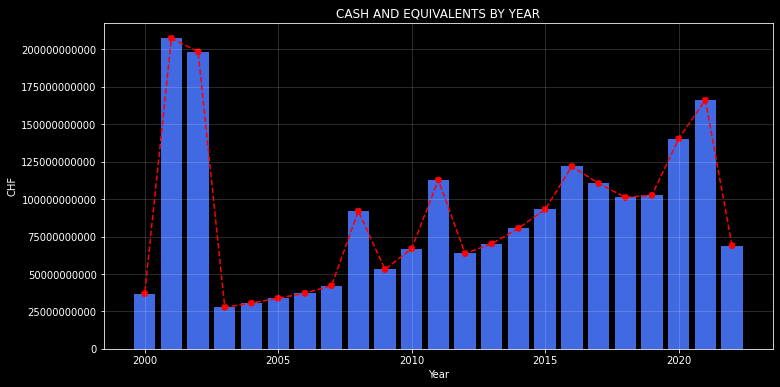

In [12]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar( df_cash_and_equivalents.year, df_cash_and_equivalents.cash, color="royalblue")
plt.plot( df_cash_and_equivalents.year, df_cash_and_equivalents.cash, color="red", linestyle="--")
plt.scatter( df_cash_and_equivalents.year, df_cash_and_equivalents.cash, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("CASH AND EQUIVALENTS BY YEAR")
plt.xlabel("Year")
plt.ylabel("CHF")
ax.grid(color='white', alpha=0.20)
plt.show()

### 2. NET RECEIVABLES 

In [13]:
net_receivables = balance_sheet_annually.loc[9]

In [14]:
net_receivables

breakdown    netReceivables
2022            13818000000
2021            19571000000
2020            40196000000
2019            40336000000
2018            43962000000
2017            51637000000
2016            38218000000
2015            40200000000
2014            47866000000
2013            56904000000
2012            51629000000
2011            49536000000
2010            43927000000
2009            51448000000
2008            68843000000
2007            69069000000
2006            61628000000
2005                      0
2004                      0
2003                      0
2002            12300820730
2001            11862008850
2000            55581344100
Name: 9, dtype: object

In [15]:
year = []
receivables = []
for k, v in net_receivables.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        receivables.append(int(v))
df_receivables = pd.DataFrame({'year': year, 'receivables': receivables})

In [16]:
df_receivables

,year,receivables
0,2022,13818000000
1,2021,19571000000
2,2020,40196000000
3,2019,40336000000
4,2018,43962000000
5,2017,51637000000
6,2016,38218000000
7,2015,40200000000
8,2014,47866000000
9,2013,56904000000


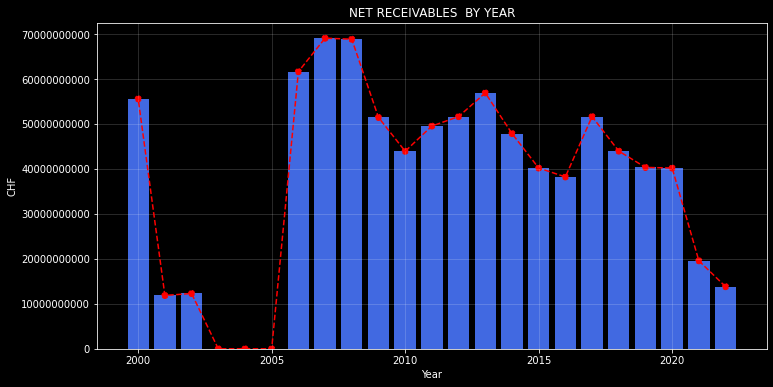

In [18]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_receivables.year,df_receivables.receivables, color="royalblue")
plt.plot(df_receivables.year,df_receivables.receivables, color="red", linestyle="--")
plt.scatter(df_receivables.year,receivables, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("NET RECEIVABLES  BY YEAR")
plt.xlabel("Year")
plt.ylabel("CHF")
ax.grid(color='white', alpha=0.20)
plt.show()

### PROPERTY PLANT EQUIPMENTNET

In [19]:
property_plant_equipment_net = balance_sheet_annually.loc[13]

In [20]:
property_plant_equipment_net

breakdown    propertyPlantEquipmentNet
2022                                 0
2021                        7305000000
2020                        7376000000
2019                        7832000000
2018                        4838000000
2017                        4686000000
2016                        4711000000
2015                        4644000000
2014                        4641000000
2013                        5091000000
2012                        5618000000
2011                        7193000000
2010                        6725000000
2009                        6436000000
2008                        6350000000
2007                        6149000000
2006                        5990000000
2005                        7445001000
2004                        7221645200
2003                        7814142960
2002                        8159539810
2001                        9453031860
2000                       24206369900
Name: 13, dtype: object

In [25]:
year = []
property_plant_equipment = []
for k, v in property_plant_equipment_net.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        property_plant_equipment.append(int(v))
df_property_plant_equipment = pd.DataFrame({"year":year, "property_plant_equipment":property_plant_equipment})

In [26]:
df_property_plant_equipment

,year,property_plant_equipment
0,2022,0
1,2021,7305000000
2,2020,7376000000
3,2019,7832000000
4,2018,4838000000
5,2017,4686000000
6,2016,4711000000
7,2015,4644000000
8,2014,4641000000
9,2013,5091000000


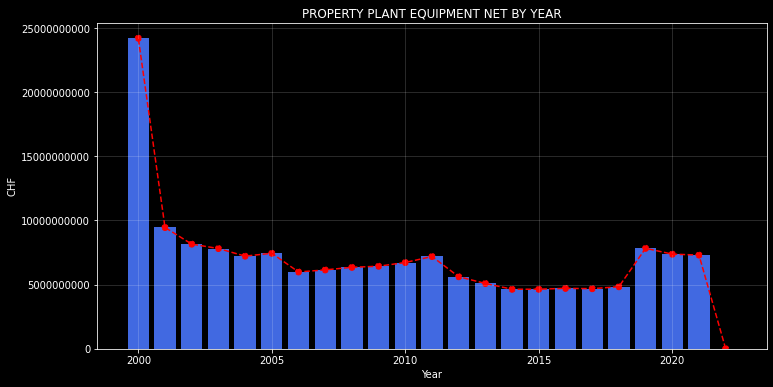

In [28]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_property_plant_equipment.year,df_property_plant_equipment.property_plant_equipment, color="royalblue")
plt.plot(df_property_plant_equipment.year,df_property_plant_equipment.property_plant_equipment, color="red", linestyle="--")
plt.scatter(df_property_plant_equipment.year,df_property_plant_equipment.property_plant_equipment, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("PROPERTY PLANT EQUIPMENT NET BY YEAR")
plt.xlabel("Year")
plt.ylabel("CHF")
ax.grid(color='white', alpha=0.20)
plt.show()

### TOTAL ASSETS

In [29]:
total_assets = balance_sheet_annually.loc[22]

In [30]:
total_assets

breakdown      totalAssets
2022          531358000000
2021          755833000000
2020          805822000000
2019          787295000000
2018          768916000000
2017          796289000000
2016          819861000000
2015          820805000000
2014          921462000000
2013          872806000000
2012          924280000000
2011         1049165000000
2010         1032005000000
2009         1031427000000
2008         1170350000000
2007         1360680000000
2006         1255956000000
2005         1342223184000
2004         1087994353600
2003         1003687381840
2002          956518399570
2001         1025913308370
2000         1059522302900
Name: 22, dtype: object

In [32]:
year = []
assets = []
for k, v in total_assets.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        assets.append(int(v))
df_total_assets = pd.DataFrame({'year':year, 'assets':assets})

In [33]:
df_total_assets

,year,assets
0,2022,531358000000
1,2021,755833000000
2,2020,805822000000
3,2019,787295000000
4,2018,768916000000
5,2017,796289000000
6,2016,819861000000
7,2015,820805000000
8,2014,921462000000
9,2013,872806000000


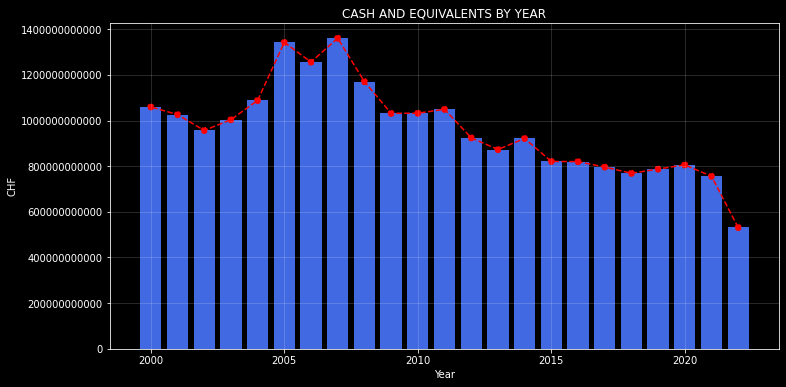

In [34]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_total_assets.year,df_total_assets.assets, color="royalblue")
plt.plot(df_total_assets.year,df_total_assets.assets, color="red", linestyle="--")
plt.scatter(df_total_assets.year,df_total_assets.assets, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("CASH AND EQUIVALENTS BY YEAR")
plt.xlabel("Year")
plt.ylabel("CHF")
ax.grid(color='white', alpha=0.20)
plt.show()

A decrease in assets can have several reasons, such as a decrease in sales, poor investment decisions, or increasing debt. It could indicate that the company is not performing well and may be facing financial difficulties. It is essential to analyze the reason behind the decrease in assets and take appropriate actions to mitigate the issue.

### COMPARING OF TOTAL ASSETS

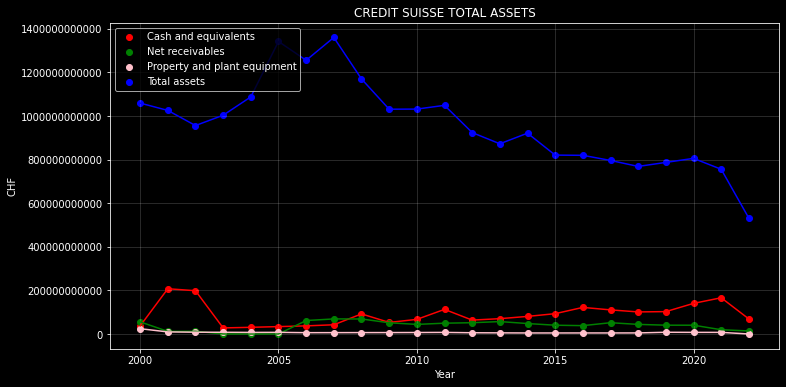

In [36]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
#cash and equivalent
plt.plot(df_cash_and_equivalents.year,df_cash_and_equivalents.cash, color="red")
plt.scatter(df_cash_and_equivalents.year,df_cash_and_equivalents.cash, color="red", label="Cash and equivalents")
#net recivables
plt.plot(df_receivables.year,df_receivables.receivables, color="green")
plt.scatter(df_receivables.year,df_receivables.receivables, color="green", label="Net receivables")
#property and plant equipment
plt.plot(df_property_plant_equipment.year,df_property_plant_equipment.property_plant_equipment, color="pink")
plt.scatter(df_property_plant_equipment.year,df_property_plant_equipment.property_plant_equipment, color="pink", label="Property and plant equipment")
#total assets
plt.plot(df_total_assets.year,df_total_assets.assets, color="blue")
plt.scatter(df_total_assets.year,df_total_assets.assets, color="blue", label="Total assets")
plt.ticklabel_format(axis='y', style='plain')
plt.title("CREDIT SUISSE TOTAL ASSETS")
plt.xlabel("Year")
plt.ylabel("CHF")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

### TREND ANALYSIS USING MACHINE LEARNING

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime

In [38]:
total_assets.values

array(['totalAssets', '531358000000', '755833000000', '805822000000',
       '787295000000', '768916000000', '796289000000', '819861000000',
       '820805000000', '921462000000', '872806000000', '924280000000',
       '1049165000000', '1032005000000', '1031427000000', '1170350000000',
       '1360680000000', '1255956000000', '1342223184000', '1087994353600',
       '1003687381840', '956518399570', '1025913308370', '1059522302900'],
      dtype=object)

In [39]:
#Creating for loop to iterate in total assets values and converting string to int
y = []
for item in total_assets:
    if item != 'totalAssets':
        y.append(int(item))

In [40]:
#Converting list to array
y = np.array(y)

In [41]:
#Checking dimension
y.ndim

1

In [42]:
y = y.reshape(-1,1)

In [43]:
y

array([[ 531358000000],
       [ 755833000000],
       [ 805822000000],
       [ 787295000000],
       [ 768916000000],
       [ 796289000000],
       [ 819861000000],
       [ 820805000000],
       [ 921462000000],
       [ 872806000000],
       [ 924280000000],
       [1049165000000],
       [1032005000000],
       [1031427000000],
       [1170350000000],
       [1360680000000],
       [1255956000000],
       [1342223184000],
       [1087994353600],
       [1003687381840],
       [ 956518399570],
       [1025913308370],
       [1059522302900]])

In [44]:
x = year

In [45]:
# reshape x to a 2-dimensional array with a single feature
x = np.array(year).reshape(-1, 1)

In [46]:
x

array([[2022],
       [2021],
       [2020],
       [2019],
       [2018],
       [2017],
       [2016],
       [2015],
       [2014],
       [2013],
       [2012],
       [2011],
       [2010],
       [2009],
       [2008],
       [2007],
       [2006],
       [2005],
       [2004],
       [2003],
       [2002],
       [2001],
       [2000]])

In [47]:
# Fit the linear regression model
reg = LinearRegression().fit(x, y)
reg

LinearRegression()

In [48]:
# Make predictions
predictions = reg.predict(x)

In [49]:
reg.intercept_

array([4.59113511e+13])

it means that the dependent variable is decreasing as the independent variable increases, but it does not start from zero. Increasing in each year the value has been decreased. 

this could mean that the company's total assets are decreasing over time, but even if there were no independent variable (such as time), the company would still have some level of assets.

In [50]:
reg.coef_

array([[-2.23505698e+10]])

The independent variable is time (measured in years) and the dependent variable is the total assets of a company (measured in CHF), a downward trend would mean that as time increases, the revenue of the company decreases. If the coefficient of the time variable is negative, it would indicate the amount of decrease in total assetsfor every unit increase in time.

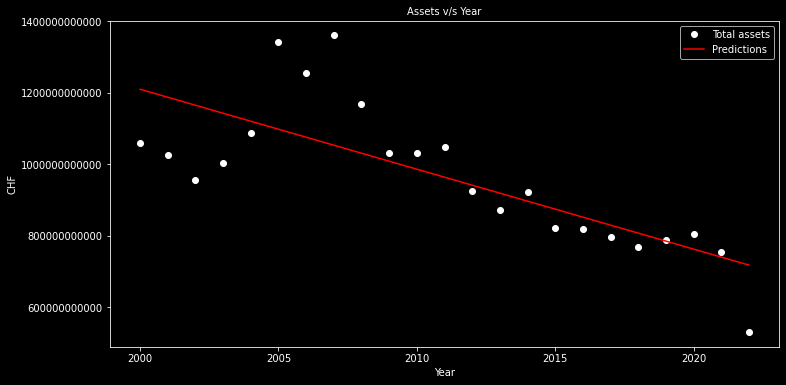

In [51]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
plt.plot(x, y, 'o', label='Total assets', color="white")
plt.plot(x, predictions, label='Predictions', color="red")
plt.xlabel('Year', fontsize=10)
plt.ylabel('CHF', fontsize=10)
plt.title('Assets v/s Year', fontsize=10)
plt.legend(fontsize=10)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

## <font color="red">CREDIT SUISSE GROUP LIABILITES

## 1. ACCOUNT PAYABLES

In [52]:
account_payables = balance_sheet_annually.loc[23]

In [53]:
account_payables

breakdown    accountPayables
2022             11442000000
2021             17029000000
2020             25950000000
2019             30784000000
2018             36082000000
2017             48894000000
2016             45891000000
2015             45463000000
2014             63508000000
2013             78795000000
2012             71428000000
2011             75176000000
2010             68544000000
2009             65993000000
2008            102952000000
2007             67637000000
2006             62441000000
2005                       0
2004                       0
2003                       0
2002                       0
2001                       0
2000             43821792900
Name: 23, dtype: object

In [54]:
year = []
payables = []
for k, v in account_payables.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        payables.append(int(v))
df_account_payables = pd.DataFrame({'year':year,'payables':payables})

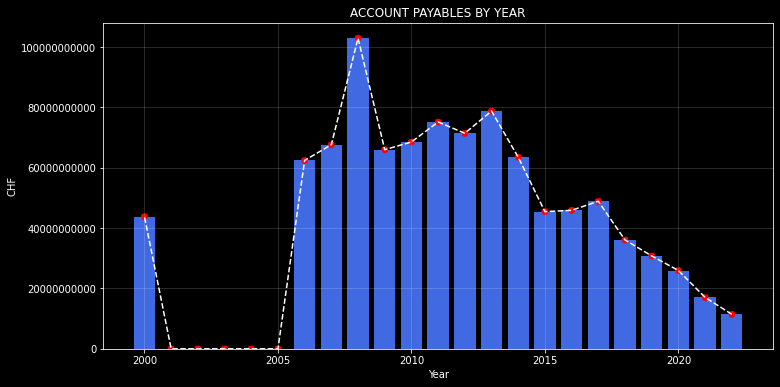

In [55]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_account_payables.year,df_account_payables.payables, color="royalblue")
plt.plot(df_account_payables.year,df_account_payables.payables, color="white", linestyle="--")
plt.scatter(df_account_payables.year,df_account_payables.payables, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("ACCOUNT PAYABLES BY YEAR")
plt.xlabel("Year")
plt.ylabel("CHF")
ax.grid(color='white', alpha=0.20)
plt.show()

A decrease in accounts payable can indicate a few things. One possibility is that the company is able to pay its bills more quickly, which can improve relationships with suppliers and potentially lead to better payment terms. Another possibility is that the company is reducing its reliance on credit, which can be a positive sign for investors. 

## 2.Long Term Debt

In [56]:
long_term_debt = balance_sheet_annually.loc[29]

In [57]:
long_term_debt

breakdown    longTermDebt
2022         157235000000
2021         169487000000
2020         163846000000
2019         155218000000
2018         154308000000
2017         173032000000
2016         193315000000
2015         197608000000
2014         177898000000
2013         130042000000
2012         148134000000
2011         162655000000
2010         173752000000
2009         159365000000
2008         150714000000
2007         160157000000
2006         147832000000
2005         133289619000
2004         106116133200
2003          89642073560
2002         394855101390
2001         421853599950
2000          98518583300
Name: 29, dtype: object

In [58]:
year = []
long_debt = []
for k, v in long_term_debt.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        long_debt.append(int(v))
df_long_term_debt = pd.DataFrame({'year':year, 'long_debt':long_debt})

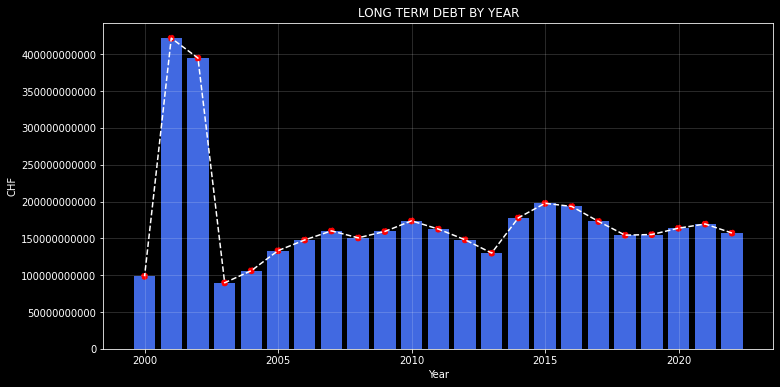

In [59]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_long_term_debt.year,df_long_term_debt.long_debt, color="royalblue")
plt.plot(df_long_term_debt.year,df_long_term_debt.long_debt, color="white", linestyle="--")
plt.scatter(df_long_term_debt.year,df_long_term_debt.long_debt, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("LONG TERM DEBT BY YEAR")
plt.xlabel("Year")
plt.ylabel("CHF")
ax.grid(color='white', alpha=0.20)
plt.show()

There is no irregular change in long term debt which mean it will have neutral impact on company

## 3. Total Liabilities

In [60]:
total_liabilities = balance_sheet_annually.loc[36]

In [61]:
total_liabilities

breakdown    totalLiabilities
2022             486027000000
2021             711603000000
2020             762881000000
2019             743581000000
2018             724897000000
2017             754100000000
2016             777550000000
2015             775787000000
2014             876461000000
2013             825640000000
2012             881996000000
2011            1008080000000
2010             988990000000
2009             983099000000
2008            1138048000000
2007            1317481000000
2006            1212370000000
2005            1292140308000
2004            1045601233600
2003             966761653000
2002             925096637930
2001             986862610980
2000            1008894136100
Name: 36, dtype: object

In [62]:
year = []
liabilities = []
for k, v in total_liabilities.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        liabilities.append(int(v))
df_total_liabilities = pd.DataFrame({'year':year,'liabilities':liabilities})

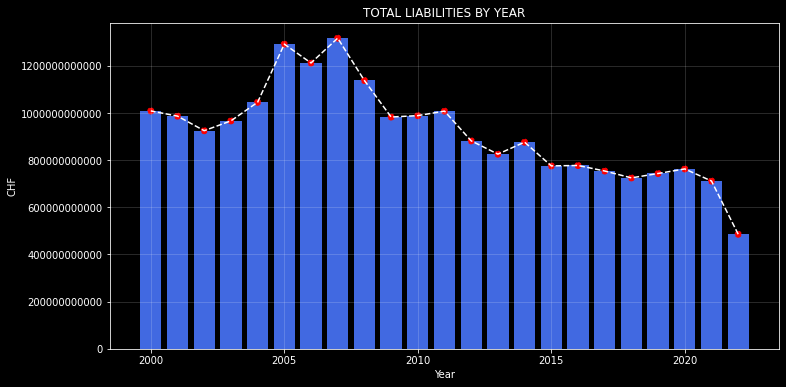

In [63]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_total_liabilities.year,df_total_liabilities.liabilities, color="royalblue")
plt.plot(df_total_liabilities.year,df_total_liabilities.liabilities, color="white", linestyle="--")
plt.scatter(df_total_liabilities.year,df_total_liabilities.liabilities, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("TOTAL LIABILITIES BY YEAR")
plt.xlabel("Year")
plt.ylabel("CHF")
ax.grid(color='white', alpha=0.20)
plt.show()

### COMPARISION OF CREDIT SUISSE GROUP LIABILITES

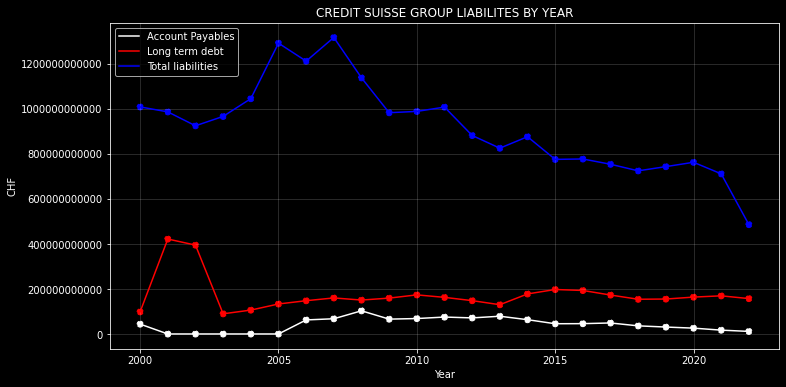

In [64]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
#Account Payables
plt.plot(df_account_payables.year,df_account_payables.payables, color="white", label="Account Payables")
plt.scatter(df_account_payables.year,df_account_payables.payables, color="white", linestyle="--")
#Long term debt
plt.plot(df_long_term_debt.year,df_long_term_debt.long_debt, color="red", label="Long term debt")
plt.scatter(df_long_term_debt.year,df_long_term_debt.long_debt, color="red", linestyle="--")
#Total liabilities
plt.plot(df_total_liabilities.year,df_total_liabilities.liabilities, color="blue", label="Total liabilities")
plt.scatter(df_total_liabilities.year,df_total_liabilities.liabilities, color="blue", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("CREDIT SUISSE GROUP LIABILITES BY YEAR")
plt.xlabel("Year")
plt.ylabel("CHF")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

### COMPARISION BETWEEN ASSETS AND LIABILITIES

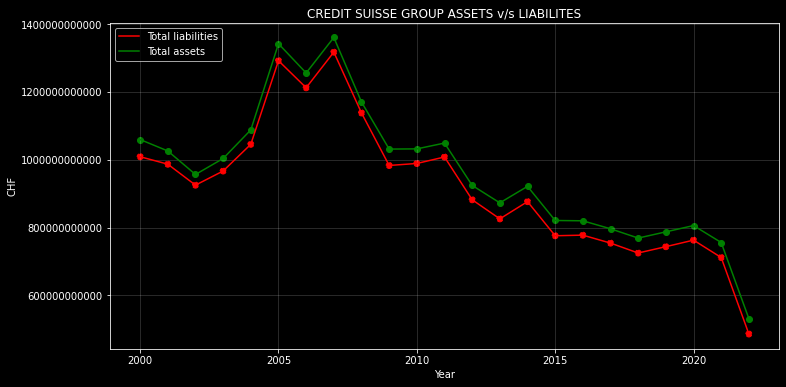

In [66]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
#Total liabilities
plt.plot(df_total_liabilities.year,df_total_liabilities.liabilities, color="red", label="Total liabilities")
plt.scatter(df_total_liabilities.year,df_total_liabilities.liabilities, color="red", linestyle="--")
#total assets
plt.plot(df_total_assets.year,df_total_assets.assets, color="green", label="Total assets")
plt.scatter(df_total_assets.year,df_total_assets.assets, color="green")
plt.ticklabel_format(axis='y', style='plain')
plt.title("CREDIT SUISSE GROUP ASSETS v/s LIABILITES")
plt.xlabel("Year")
plt.ylabel("CHF")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

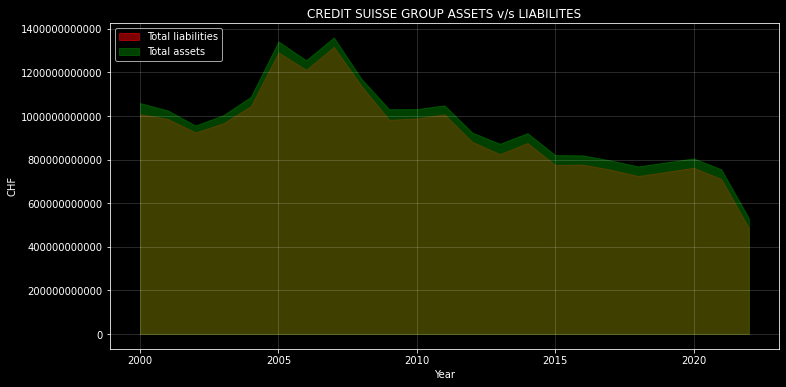

In [67]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
#Total liabilities
plt.fill_between(df_total_liabilities.year, df_total_liabilities.liabilities, color="red", alpha=0.5, label="Total liabilities")
#total assets
plt.fill_between(df_total_assets.year, df_total_assets.assets, color="green", alpha=0.5, label="Total assets")
plt.ticklabel_format(axis='y', style='plain')
plt.title("CREDIT SUISSE GROUP ASSETS v/s LIABILITES")
plt.xlabel("Year")
plt.ylabel("CHF")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

The assets and liabilities graphs appear the same due to the accounting equation: Assets = Liabilities + Equity. In other words, the assets of a company must equal the sum of its liabilities and equity. As a result, if one of the variables changes, the other must change as well to maintain the equation.

## <font color="red"> SHAREHOLDERS' EQUITY

In [68]:
balance_sheet_annually

,breakdown,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,reportedCurrency,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,...,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF
1,cik,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,...,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510
2,fillingDate,2022-12-31,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,...,2009-12-31,2008-12-31,2007-12-31,2006-12-31,2005-12-31,2004-12-31,2003-12-31,2002-12-31,2001-12-31,2000-12-31
3,acceptedDate,2022-12-30 19:00:00,2021-12-30 19:00:00,2020-12-30 19:00:00,2019-12-30 19:00:00,2018-12-30 19:00:00,2017-12-30 19:00:00,2016-12-30 19:00:00,2015-12-30 19:00:00,2014-12-30 19:00:00,...,2009-12-30 19:00:00,2008-12-30 19:00:00,2007-12-30 19:00:00,2006-12-30 19:00:00,2005-12-30 19:00:00,2004-12-30 19:00:00,2003-12-30 19:00:00,2002-12-30 19:00:00,2001-12-30 19:00:00,2000-12-30 19:00:00
4,calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
5,period,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
6,cashAndCashEquivalents,68933000000,166141000000,140410000000,102620000000,101189000000,110541000000,121933000000,93195000000,80593000000,...,53034000000,92047000000,42218000000,37168000000,33799488000,30552676000,27773293080,198507794700,207566036010,36939415300
7,shortTermInvestments,0,154000000,149000000,168000000,857000000,867000000,585000000,452000000,992000000,...,2508000000,3424000000,3529000000,4643000000,0,0,0,0,0,0
8,cashAndShortTermInvestments,68933000000,166295000000,140559000000,102788000000,102046000000,111408000000,122518000000,93647000000,81585000000,...,55542000000,95471000000,45747000000,41811000000,33799488000,30552676000,27773293080,198507794700,207566036010,36939415300
9,netReceivables,13818000000,19571000000,40196000000,40336000000,43962000000,51637000000,38218000000,40200000000,47866000000,...,51448000000,68843000000,69069000000,61628000000,0,0,0,12300820730,11862008850,55581344100


In [69]:
common_stock = balance_sheet_annually.loc[38]
retained_earning = balance_sheet_annually.loc[39]
total_share_holder_equity = balance_sheet_annually.loc[42]
total_liabilities_and_shareholders_equity = balance_sheet_annually.loc[44]

In [70]:
year = []
common_stocks = []
retained_earnings = []
total_share_holder_equitys = []
total_liabilities_and_shareholders_equitys = []
#Common stock
for k, v in common_stock.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        common_stocks.append(int(v))
#Retained earning
for k, v in retained_earning.items():
    if k != 'breakdown':  # skip the header
        retained_earnings.append(int(v))
#Total share holder equity
for k, v in total_share_holder_equity.items():
    if k != 'breakdown':  # skip the header
        total_share_holder_equitys.append(int(v))
#Total liabilities and share holders equity
for k, v in total_liabilities_and_shareholders_equity.items():
    if k != 'breakdown':  # skip the header
        total_liabilities_and_shareholders_equitys.append(int(v))

In [71]:
len(year)

23

In [72]:
len(common_stocks)

23

In [73]:
len(total_liabilities_and_shareholders_equitys)

23

In [74]:
df_equity = pd.DataFrame({'year':year, 
                          'common_stock':common_stocks, 
                          'retained_earnings':retained_earnings,
                          'total_share_holder_equity':total_share_holder_equitys,
                          'total_liabilities_and_shareholders_equitys':total_liabilities_and_shareholders_equitys,
                         })

### 1. COMMON STOCK

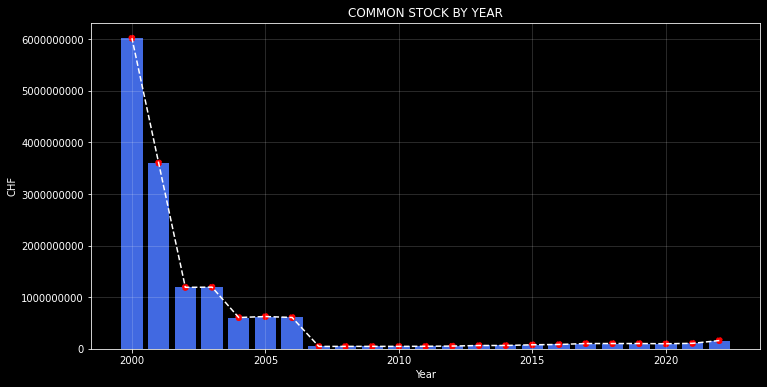

In [75]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_equity.year,df_equity.common_stock, color="royalblue")
plt.plot(df_equity.year,df_equity.common_stock, color="white", linestyle="--")
plt.scatter(df_equity.year,df_equity.common_stock, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("COMMON STOCK BY YEAR")
plt.xlabel("Year")
plt.ylabel("CHF")
ax.grid(color='white', alpha=0.20)
plt.show()

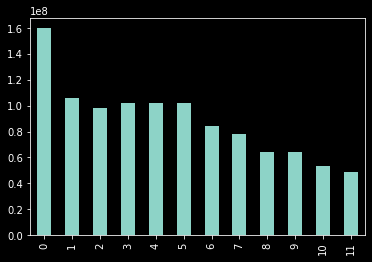

In [76]:
df_equity.common_stock.head(12).plot.bar();

### 2. RETAINED EARNINGS

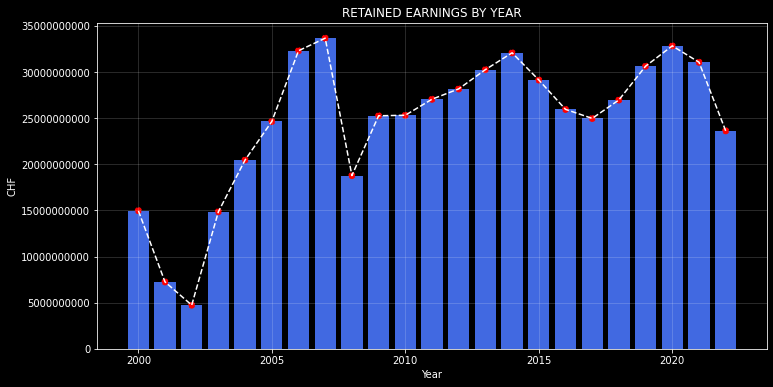

In [77]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_equity.year,df_equity.retained_earnings, color="royalblue")
plt.plot(df_equity.year,df_equity.retained_earnings, color="white", linestyle="--")
plt.scatter(df_equity.year,df_equity.retained_earnings, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("RETAINED EARNINGS BY YEAR")
plt.xlabel("Year")
plt.ylabel("CHF")
ax.grid(color='white', alpha=0.2)

Retained earnings of Credit Suisse may have been impacted by a variety of factors, such as changes in accounting policies, corporate actions, and economic conditions.
Retained earning is above the last great recession on 2008.

### 3. TOTAL SHARE HOLDER EQUITY

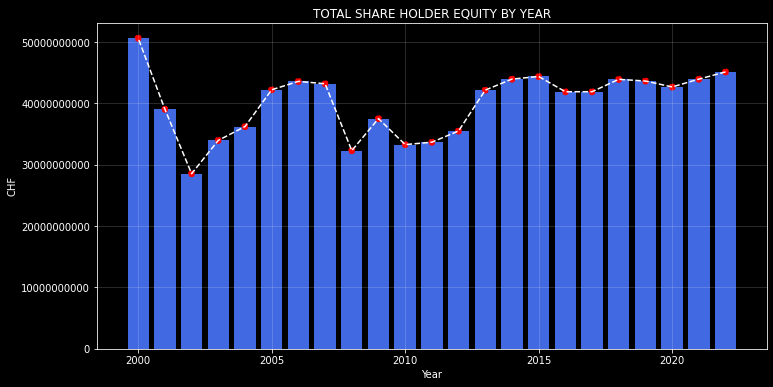

In [78]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_equity.year,df_equity.total_share_holder_equity, color="royalblue")
plt.plot(df_equity.year,df_equity.total_share_holder_equity, color="white", linestyle="--")
plt.scatter(df_equity.year,df_equity.total_share_holder_equity, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("TOTAL SHARE HOLDER EQUITY BY YEAR")
plt.xlabel("Year")
plt.ylabel("CHF")
ax.grid(color='white', alpha=0.2)

### 4. TOTAL LIABILITIES AND SHAREHOLDERS EQUITYS

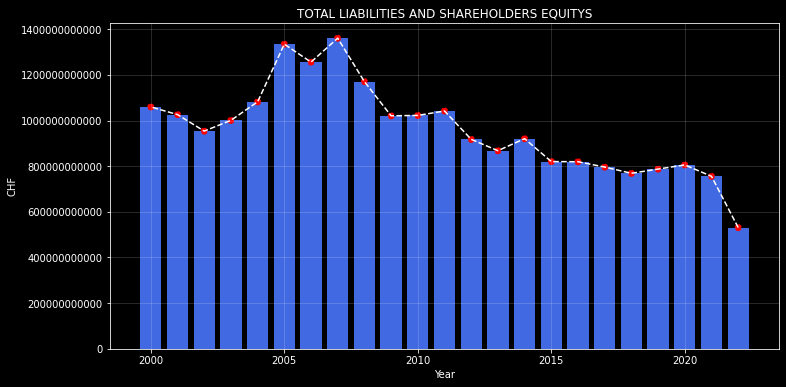

In [79]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_equity.year,df_equity.total_liabilities_and_shareholders_equitys, color="royalblue")
plt.plot(df_equity.year,df_equity.total_liabilities_and_shareholders_equitys, color="white", linestyle="--")
plt.scatter(df_equity.year,df_equity.total_liabilities_and_shareholders_equitys, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("TOTAL LIABILITIES AND SHAREHOLDERS EQUITYS")
plt.xlabel("Year")
plt.ylabel("CHF")
ax.grid(color='white', alpha=0.2)

1. Decrease in liabilities

One possible explanation is that the company has been able to pay off or reduce its liabilities, which can be seen as a positive sign. This could be due to better management of debt or an improvement in the company's financial position.

2. Decrease in shareholder equity

Shareholder equity has decreased, which can be seen as a negative sign. This could be due to a decrease in the company's profits or a decrease in the value of its assets.

It's also possible that both liabilities and shareholder equity have decreased, which can be a more complex situation to interpret. This could be due to a variety of factors such as a decrease in revenue or profitability, increased expenses, or a decline in the value of assets.

### INSIGHT INTO COMPANY EQUITY

In [80]:
from mpl_toolkits import mplot3d

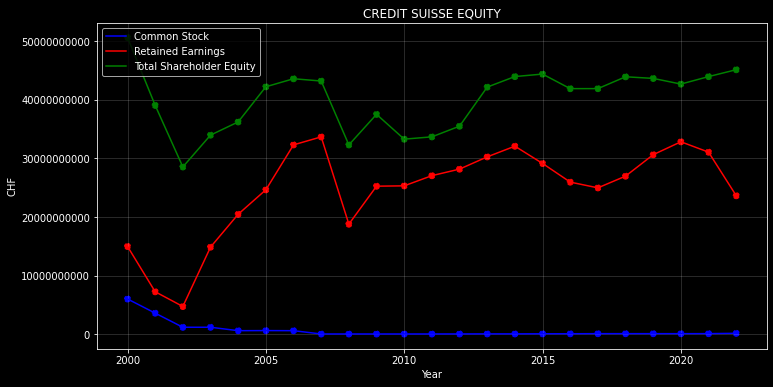

In [81]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))

# Common stock
plt.plot(df_equity.year,df_equity.common_stock, color="blue", label="Common Stock")
plt.scatter(df_equity.year,df_equity.common_stock, color="blue", linestyle="--")

# Retained earnings
plt.plot(df_equity.year,df_equity.retained_earnings, color="red", label="Retained Earnings")
plt.scatter(df_equity.year,df_equity.retained_earnings, color="red", linestyle="--")

# Total shares holder equity
plt.plot(df_equity.year,df_equity.total_share_holder_equity, color="green", label="Total Shareholder Equity")
plt.scatter(df_equity.year,df_equity.total_share_holder_equity, color="green", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("CREDIT SUISSE EQUITY")
plt.xlabel("Year")
plt.ylabel("CHF")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

#### This chart dosen't include total liabilities and shareholders equity

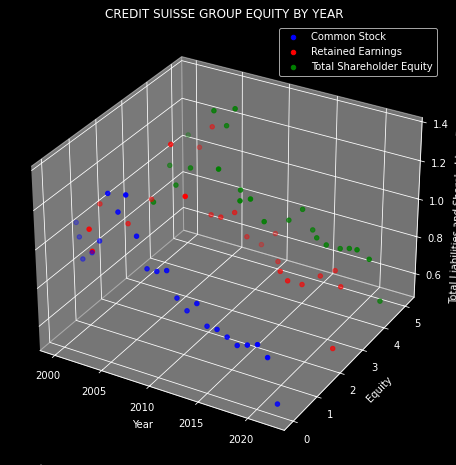

In [82]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Year')
ax.set_ylabel('Equity')
ax.set_zlabel('Total Liabilities and Shareholders Equity')
ax.scatter(df_equity.year, df_equity.common_stock, df_equity.total_liabilities_and_shareholders_equitys, color='blue', label='Common Stock')
ax.scatter(df_equity.year, df_equity.retained_earnings, df_equity.total_liabilities_and_shareholders_equitys, color='red', label='Retained Earnings')
ax.scatter(df_equity.year, df_equity.total_share_holder_equity, df_equity.total_liabilities_and_shareholders_equitys, color='green', label='Total Shareholder Equity')
ax.legend()
plt.title("CREDIT SUISSE GROUP EQUITY BY YEAR")
plt.show()

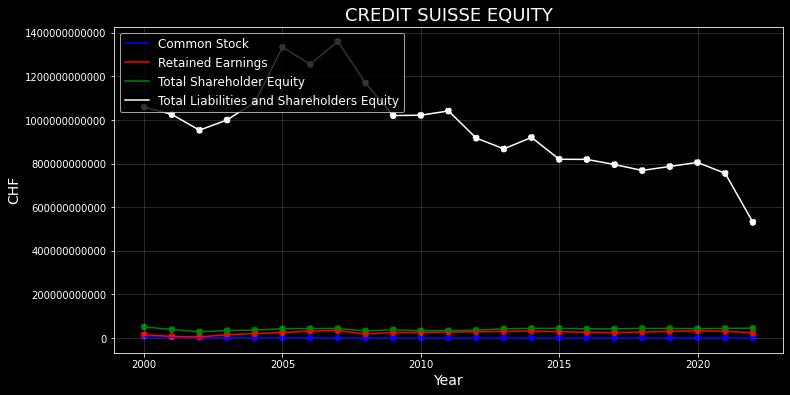

In [83]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
#Common stock
plt.plot(df_equity.year,df_equity.common_stock, color="blue", label="Common Stock")
plt.scatter(df_equity.year,df_equity.common_stock, color="blue", linestyle="--")
#retained earnings
plt.plot(df_equity.year,df_equity.retained_earnings, color="red", label="Retained Earnings")
plt.scatter(df_equity.year,df_equity.retained_earnings, color="red", linestyle="--")
#total shares holder equity
plt.plot(df_equity.year,df_equity.total_share_holder_equity, color="green", label="Total Shareholder Equity")
plt.scatter(df_equity.year,df_equity.total_share_holder_equity, color="green", linestyle="--")
#total liabilities and shareholders equity
plt.plot(df_equity.year,df_equity.total_liabilities_and_shareholders_equitys, color="white", label="Total Liabilities and Shareholders Equity")
plt.scatter(df_equity.year,df_equity.total_liabilities_and_shareholders_equitys, color="white", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("CREDIT SUISSE EQUITY", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("CHF", fontsize=14)
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left", fontsize=12)
plt.show()

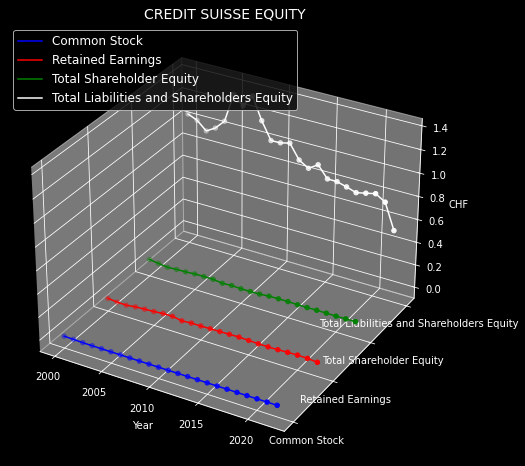

In [84]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# plot common stock
ax.plot(df_equity.year, [0]*len(df_equity.year), df_equity.common_stock, color="blue", label="Common Stock")
ax.scatter(df_equity.year, [0]*len(df_equity.year), df_equity.common_stock, color="blue")
# plot retained earnings
ax.plot(df_equity.year, [1]*len(df_equity.year), df_equity.retained_earnings, color="red", label="Retained Earnings")
ax.scatter(df_equity.year, [1]*len(df_equity.year), df_equity.retained_earnings, color="red")
# plot total shareholder equity
ax.plot(df_equity.year, [2]*len(df_equity.year), df_equity.total_share_holder_equity, color="green", label="Total Shareholder Equity")
ax.scatter(df_equity.year, [2]*len(df_equity.year), df_equity.total_share_holder_equity, color="green")
# plot total liabilities and shareholders equity
ax.plot(df_equity.year, [3]*len(df_equity.year), df_equity.total_liabilities_and_shareholders_equitys, color="white", label="Total Liabilities and Shareholders Equity")
ax.scatter(df_equity.year, [3]*len(df_equity.year), df_equity.total_liabilities_and_shareholders_equitys, color="white")
ax.set_title("CREDIT SUISSE EQUITY", fontsize=14)
ax.set_xlabel("Year")
ax.set_zlabel("CHF")
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(["Common Stock", "Retained Earnings", "Total Shareholder Equity", "Total Liabilities and Shareholders Equity"])
ax.legend(loc="upper left", fontsize=12)
plt.show()